# Vortex

Vortex é movimento em linhas circulares, em um fluido é quando esse flui por linhas de corrente circulares. 

<img src="https://upload.wikimedia.org/wikipedia/commons/4/48/Rotational_vortex.gif" >

Em um vortex irrotacional, apesar de fluido andar em circulos, suas partículas não rotacionam em volta de si mesmas.


<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/Irrotational_vortex.gif" >

Um vortex irrotacional possui velocidade radial nula e velocidade tangencial inversamente proporcional à distância da particula ao centro.

$$ u_\theta (r,\theta) = \frac{constante}{r}\ ,\ u_r (r,\theta) = 0  $$

A vorticidade é zero em qualquer ponto, exceto no centro do vortex, onde a derivada de $u_\theta$ é infinita. 

Utilizando o conceito de circulação visto anteriormente. Uma linha de corrente fechada em volta de um vortex, temos:

$$ \Gamma = \oint \bold{v} \cdot d\vec{l} = u_\theta 2\pi r $$

Assim, temos o valor da constante de $u_\theta$:

$$ u_\theta (r,\theta) = \frac{\Gamma}{2\pi r} $$

E a função corrente fica:

$$ \psi(r,\theta) = \frac{\Gamma}{2\pi r} \ln r $$

Em coordenadas cartesianas, a função corrente fica:

$$ \psi (x,y) = \frac{\Gamma}{4\pi} \ln (x^2 + y^2) $$

e as componentes da velocidade ficam:

$$ u(x,y) = \frac{\Gamma}{2\pi}\frac{y}{x^2 + y^2}\ ,\ v(x,y) = -\frac{\Gamma}{2\pi}\frac{x}{x^2 + y^2} $$

### Codificando o Vortex

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
#para plotar os gráficos em linha
%matplotlib inline

In [2]:
n_points = 50
x_inicio, x_fim = -2.0, 2.0
y_inicio, y_fim = -1.0, 1.0
x = np.linspace(x_inicio,x_fim,n_points)
y = np.linspace(y_inicio,y_fim,n_points)
X, Y = np.meshgrid(x, y)

Vamos dar ao vortex uma intensidade de $\Gamma = 5$ e coloca-lo no centro do domínio:

In [3]:
gamma = 5.0  #Intensidade do vortex
x_vortex, y_vortex = 0.0, 0.0 #Posicionamento do vortex

Para calcular o campo de velocidades e a função corrente gerados pelo vortice, vamos definir duas funções:

 - get_velocity_vortex();
 - get_stream_function_vortex().

In [5]:
def get_velocity_vortex(gamma, xv, yv, X, Y):
    """
    Retorna o campo de velocidades dado um vortex

    Parametros
    ---------
    forca:float
        força do vortex
    xd: float
        coordenada x do vortex
    yd: float
        coordenada y do vortex
    X: Array numpy 2D de float
        coordenadas x da malha de pontos
    Y: Array numpy 2D de float
        coordenadas y da malha de pontos

    Retorna
    ---------
    u: array numpy 2D de float
        componentes x do campo vetorial de velocidades
    v: array numpy 2D de float
        componentes y do campo vetorial de velocidades
    """
    u = (gamma/(2*np.pi))*((Y-yv)/((X-xv)**2+(Y-yv)**2))
    v = -(gamma/(2*np.pi))*((X-xv)/((X-xv)**2+(Y-yv)**2))

    return u, v



def get_stream_function_vortex(gamma, xv, yv, X, Y):
    """
    Retorna a função-corrente dado um vortex

    Parametros
    ---------
    forca:float
        força do vortex
    xd: float
        coordenada x do vortex
    yd: float
        coordenada y do vortex
    X: Array numpy 2D de float
        coordenadas x da malha de pontos
    Y: Array numpy 2D de float
        coordenadas y da malha de pontos

    Retorna
    ---------
    psi: array numpy 2D de floats
        A função-corrente
    """
    psi = (gamma/(2*np.pi))*np.log((X-xv)**2+(Y-yv)**2)

    return psi


Com as funções definidas, podemos ir para a visualização do vórtice

In [6]:
#Calculo das velocidades e função-corrente conforme as fórmulas criadas anteriormente
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

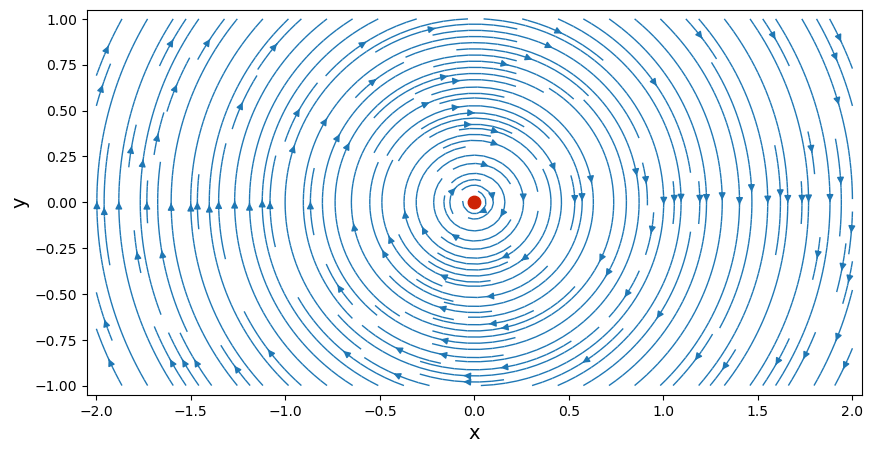

In [7]:
#plotando as linhas de corrente
width = 10.0
height = (y_fim - y_inicio)/(x_fim - x_inicio) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_inicio-0.05, x_fim+0.05)
plt.ylim(y_inicio-0.05, y_fim+0.05)

plt.streamplot(X,Y,u_vortex, v_vortex,
               density=2,linewidth=1, arrowsize=1,arrowstyle='-|>')
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')

### Vortex e sumidouro

Vamos adicionar um sumidouro junto ao vortex para observar os efeitos sobrepostos, para isso iremos resgatar o código da função de fonte/sumidouro feito anteriormente

In [8]:
def get_velocity_sink(forca, xs, ys, X, Y):
    """
    Retorna o campo de velocidades dado uma fonte/sumidouro

    Parametros
    ---------
    forca:float
        força da fonte/sumidouro
    xs: float
        coordenada x da fonte/sumidouro
    ys: float
        coordenada y da fonte/sumidouro
    X: Array numpy 2D de float
        coorddenadas x da malha de pontos
    Y: Array numpy 2D de float
        coorddenadas y da malha de pontos

    Retorna
    ---------
    u: array numpy 2D de float
        componentes x do campo vetorial de velocidades
    v: array numpy 2D de float
        componentes y do campo vetorial de velocidades
    """

    u = forca/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = forca/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)

    return u, v

def get_stream_function_sink(forca, xs, ys, X, Y):
    """
    Retorna a função corrente gerada por uma fonte/sumidouro

    Parametros
    ---------
    forca:float
        força da fonte/sumidouro
    xs: float
        coordenada x da fonte/sumidouro
    ys: float
        coordenada y da fonte/sumidouro
    X: Array numpy 2D de float
        coorddenadas x da malha de pontos
    Y: Array numpy 2D de float
        coorddenadas y da malha de pontos

    Retorna
    ---------
    psi: array numpy 2D de floats
        A função-corrente
    """
    psi = forca/(2*np.pi)*np.arctan2((Y-ys),(X-xs))

    return psi

In [9]:
forca_sumi  = -1.0            # força do sumidouro
x_sumi, y_sumi = 0.0, 0.0       # posição do sumidouro

In [10]:
# compute the velocity field on the mesh grid
u_sumi, v_sumi = get_velocity_sink(forca_sumi, x_sumi, y_sumi, X, Y)

# compute the stream-function on the mesh grid
psi_sumi = get_stream_function_sink(forca_sumi, x_sumi, y_sumi, X, Y)

Agora devemos sobrepor o vórtice e o sumidouro

In [12]:
u = u_vortex + u_sumi
v = v_vortex + v_sumi
psi = psi_vortex + psi_sumi

Hora de visualizar!

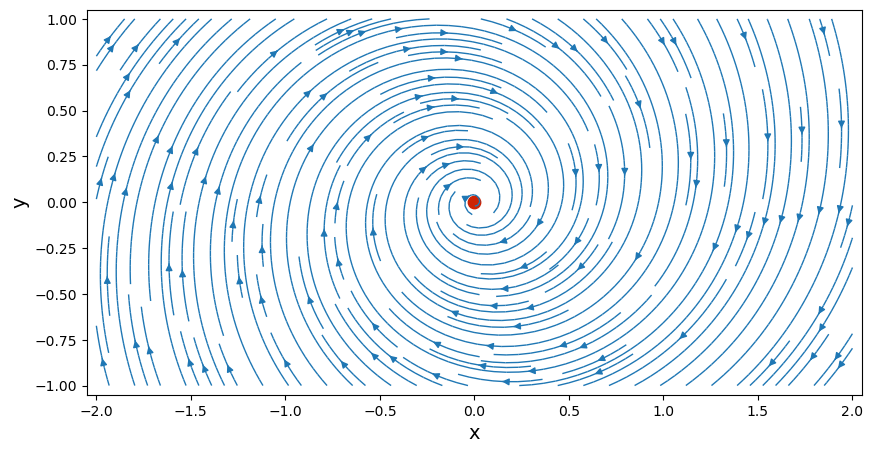

In [13]:
#plotando as linhas de corrente
width = 10.0
height = (y_fim - y_inicio)/(x_fim - x_inicio) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_inicio-0.05, x_fim+0.05)
plt.ylim(y_inicio-0.05, y_fim+0.05)

plt.streamplot(X,Y,u, v,
               density=2,linewidth=1, arrowsize=1,arrowstyle='-|>')
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')